# Preliminary Data Processing
To start off, we read in our dataset and generate a simple preview and statistics of our data.

In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from ipynb.fs.full.functions import eda, top5, categorical_eda
%matplotlib inline

# import dataset and view head
df = pd.read_csv('data/yoco/capital_events_case_study.csv')
df.head()

,timestamp,event,user_id,context_os_version
0,2020-08-01 04:22:45.924000,pos_home_capital_card_pressed,1560415889593-99b63968-1017-4588-a4e5-a7b48ce6...,11.1.2
1,2020-08-01 05:18:05.086000,pos_home_capital_card_pressed,1471697083279-b783deca-88d9-4f97-9e9a-bf9dad6c...,13.6
2,2020-08-01 06:37:40.708000,pos_home_capital_card_pressed,1534411372475-1f8ec9b3-4786-4afb-a9af-008dc86f...,13.6
3,2020-08-01 08:14:49.313000,pos_home_capital_card_pressed,1594410129560-67427b34-cdd7-4632-8c21-cc1bcce3...,13.5.1
4,2020-08-01 08:55:21.598000,pos_home_capital_card_pressed,1574670688114-0cbf4e3c-cf23-4250-923f-540a0a43...,13.5.1


### Lets make sure the timestamp is a date and then run our EDA functions

Preview of data:


,timestamp,event,user_id,context_os_version
0,2020-08-01 04:22:45.924,pos_home_capital_card_pressed,1560415889593-99b63968-1017-4588-a4e5-a7b48ce6...,11.1.2
1,2020-08-01 05:18:05.086,pos_home_capital_card_pressed,1471697083279-b783deca-88d9-4f97-9e9a-bf9dad6c...,13.6
2,2020-08-01 06:37:40.708,pos_home_capital_card_pressed,1534411372475-1f8ec9b3-4786-4afb-a9af-008dc86f...,13.6



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25046 entries, 0 to 25045
Data columns (total 4 columns):
timestamp             25046 non-null datetime64[ns]
event                 25046 non-null object
user_id               25041 non-null object
context_os_version    25046 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 782.8+ KB
None

Preview of data with null values:


,timestamp,event,user_id,context_os_version
2714,2020-08-11 17:08:10.114,pos_home_capital_card_pressed,NaN,12.4.8
15243,2020-10-09 11:01:27.689,pos_home_capital_card_pressed,NaN,13.6.1
19897,2020-10-26 12:14:17.946,pos_home_capital_card_pressed,NaN,12.4.8


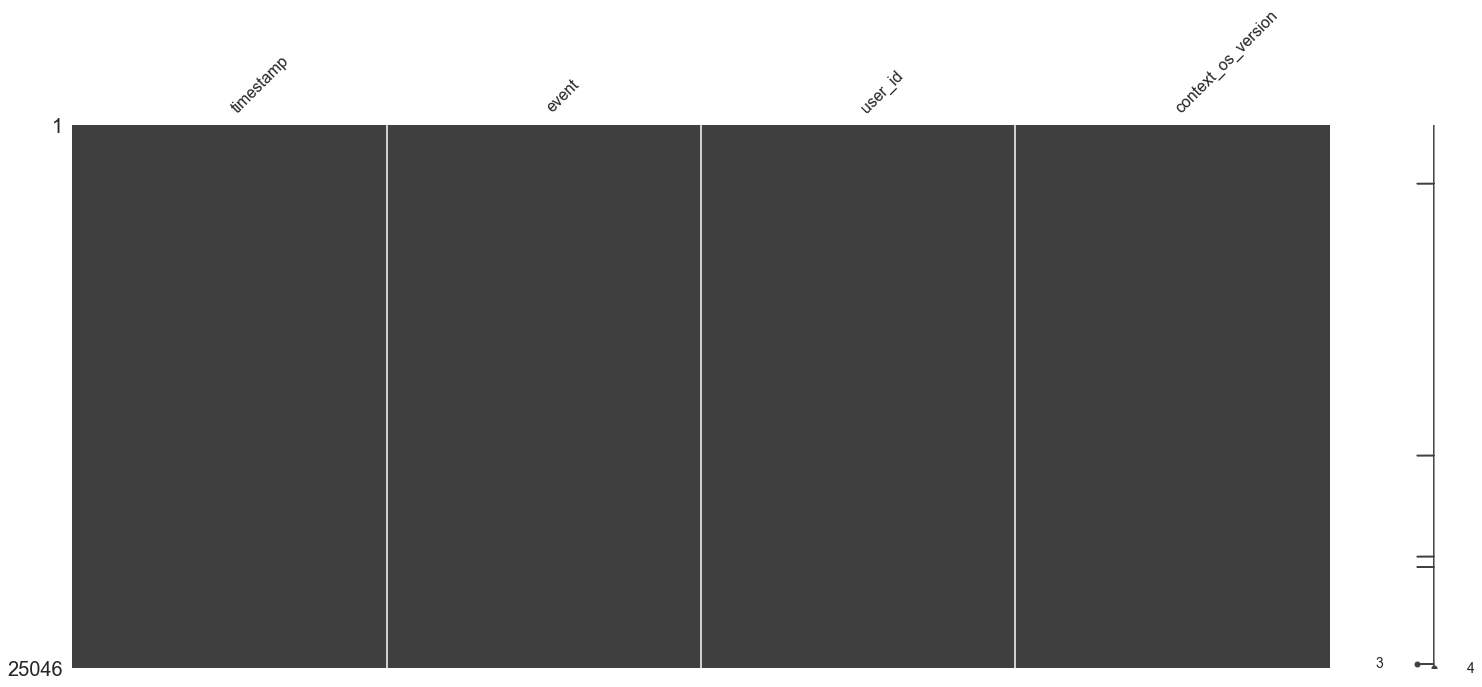


***Number of duplicated entries:  1


,timestamp,event,user_id,context_os_version
12086,2020-09-28 00:26:20.337,pos_capital_button_let_me_know,1564406006402-6d3df83d-40cb-4f88-969f-67266f2c...,12.4.8
12642,2020-09-28 00:26:20.337,pos_capital_button_let_me_know,1564406006402-6d3df83d-40cb-4f88-969f-67266f2c...,12.4.8



To check: 
Unique count of non-numeric data

event                    9
user_id               4111
context_os_version      68
dtype: int64
Top 5 unique values of event
                                 event  Count
0        pos_home_capital_card_pressed  22281
1       pos_capital_button_let_me_know    939
2  pos_capital_button_get_cash_advance    626
3          pos_capital_button_continue    545
4      pos_capital_button_accept_offer    318
 
Top 5 unique values of user_id
                                             user_id  Count
0  1593804880686-0e0ca35a-c7c4-4878-9f3a-161df62c...    261
1  1518421649600-b1e4fef2-f94c-44a4-a059-06538056...    242
2  1547271028164-367f154f-bcfc-40ab-ad9c-536a971f...    187
3  1489131121216-a3f50115-3139-4aa3-8da6-9ebfc027...    184
4  1587849726340-87f0b6ba-c94c-446d-a702-7587384e...    181
 
Top 5 unique values of context_os_version
  context_os_version  Count
0               13.7   5639
1             13.6.1   4004
2               13.6   2657
3     

In [7]:
# set timestamp to correct data type
df['timestamp'] = pd.to_datetime(df['timestamp'])
# run EDA functions
eda(df)

### we can remove the bulls and duplicates, then chekc out the dates in the dataset

In [8]:
# Remove nulls as there are only 5 a very small percentage
df=df.dropna()
# Dop duplicate rows as there is only 1
df.drop_duplicates(inplace=True)

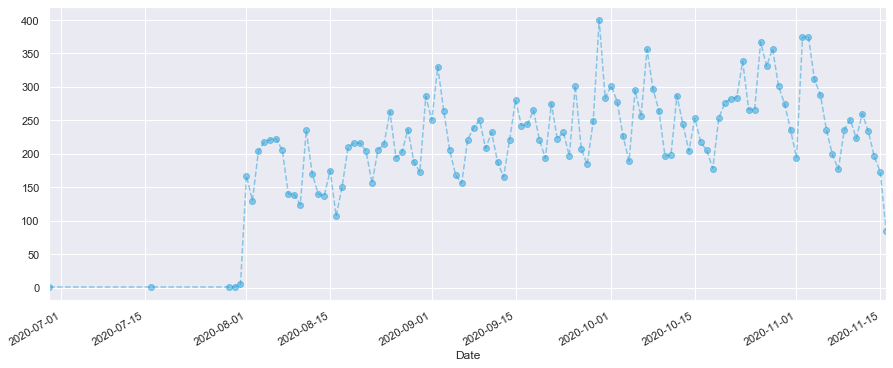

In [9]:
df = df.set_index('timestamp')

# Add columns with year, month, and weekday name
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Date'] = df.index.date
df['Weekday Name'] = df.index.weekday_name

eventcounts = df.groupby('Date')['user_id'].count()
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(25, 8)})

eventcounts.plot(marker='o', alpha=0.5, linestyle='--', figsize=(15, 6), subplots=True, color='#24a0db');

### For our final dataset, lets remove June & July data as well as the half month of data for November.
### This will be conducted in other workbooks at the start before any analysis